# Step 1: System Setup for Installing ROS2 Iron (Ubuntu 22)

# Setting Your Locale

Start by opening a terminal window

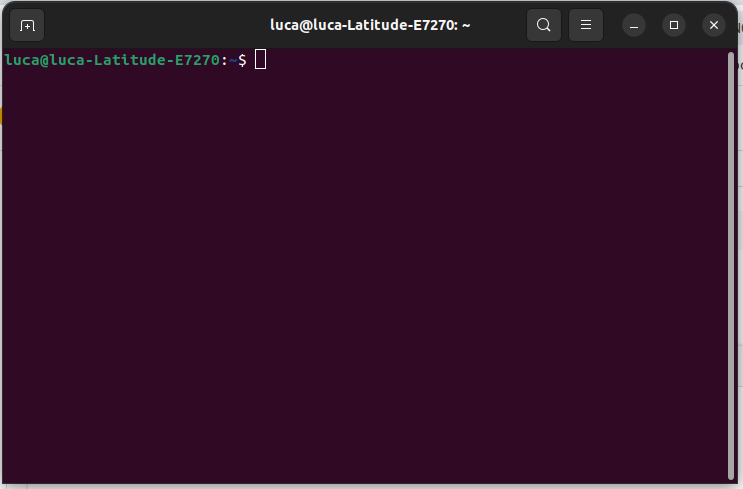

In your terminal window, enter the command:


```
locale
```

and look for anything that says "UTF-8"
For example:
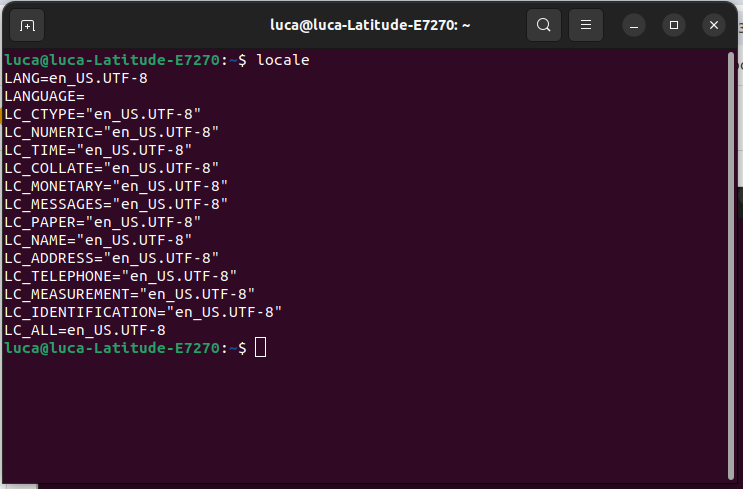

If your locale is not set to UTF-8, run the following commands:

```
sudo apt update && sudo apt install locales
sudo locale-gen en_US en_US.UTF-8
sudo update-locale LC_ALL=en_US.UTF-8 LANG=en_US.UTF-8
export LANG=en_US.UTF-8
```
After running them, run ```locale``` again to make sure that your locale is in UTF-8

# Enable Required Repositories

In your terminal, run the following commands:


```
sudo apt install software-properties-common
sudo add-apt-repository universe
```


# Add the ROS2 GPG Key

In your terminal, run the following commands:


```
sudo apt update && sudo apt install curl -y
sudo curl -sSL https://raw.githubusercontent.com/ros/rosdistro/master/ros.key -o /usr/share/keyrings/ros-archive-keyring.gpg
```

# Add the Repository to your Sources List
In your terminal, run the following command:


```
echo "deb [arch=$(dpkg --print-architecture) signed-by=/usr/share/keyrings/ros-archive-keyring.gpg] http://packages.ros.org/ros2/ubuntu $(. /etc/os-release && echo $UBUNTU_CODENAME) main" | sudo tee /etc/apt/sources.list.d/ros2.list > /dev/null
```

# (Optional Step) Install development Tools

This step is for if you want development tools for ROS2, highly recommended to install.

In your terminal, run the following command:


```
sudo apt update && sudo apt install ros-dev-tools
```



# Installing ROS2 Iron

Start by updating and upgrading apt. Run the following commands in your terminal:


```
sudo apt update
sudo apt upgrade
```

Next, decide which version of ROS2 Iron you would like to install. The standard version is the desktop verison, which you can install via the following command:


```
sudo apt install ros-iron-desktop
```
However, if you want to install the barebones version of ROS2 Iron, run the following command:


```
sudo apt install ros-iron-ros-base
```

After installing, to setup the environment, run the command:
```
source /opt/ros/iron/setup.bash
```
NOTE: If you are not using bash as your shell, replace .bash with your shell extension (i.e. .sh, .zsh, etc)

# Testing your installation

Open up two terminals. In the first terminal, enter the following commands:
```
source /opt/ros/iron/setup.bash
ros2 run demo_nodes_cpp talker
```

You should see the following start to appear:
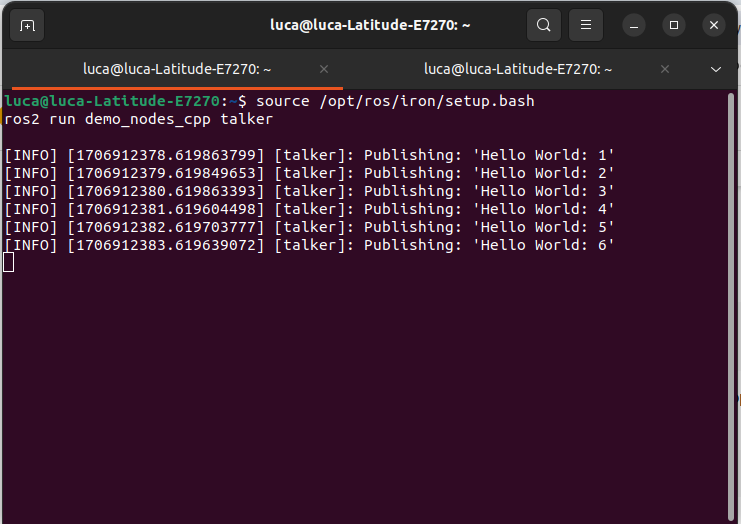

In your other terminal, enter the following commands:
```
source /opt/ros/iron/setup.bash
ros2 run demo_nodes_cpp listnener
```
And it should start reading the output of the previous terminal:
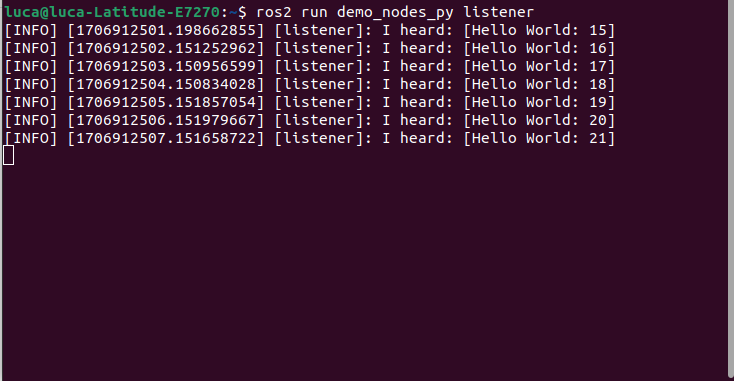

If this is the case, you have successfully installed ROS2 Iron!

# Step 2: Setting up Turtle Interfaces

First thing, we have to set up the packages for Python Turtle.

Open up an Ubuntu terminal, and enter the following commands:


```
cd ~/Robotics_Middleware_Trial_Python_Turtle/ROS2/dev_ws/src
source /opt/ros/iron/setup.bash
ros2 pkg create --build-type ament_python python_turtle
```

This will create a package called python_turtle. Next we want to do the same thing for turtle interfaces.
In the same terminal, run the following command:
```
ros2 pkg create --build-type ament_cmake turtle_interfaces
```

Navigate to the newly created `turtle_interfaces` directory. In that directory, create a folder called `msg` and within that folder, creat a file named `Turtlemsg.msg`
In the `Turtlemsg.msg` file, enter the following text:
```
string name
geometry_msgs/Pose turtle_pose
string color
```
Back in the `turtle_interfaces` directory, open the `CMakeLists.txt` file and locate the line that says `ament_package()`. Above that line, enter the following text:
```
find_package(geometry_msgs REQUIRED)
find_package(rosidl_default_generators REQUIRED)

rosidl_generate_interfaces(${PROJECT_NAME}
  "msg/Turtlemsg.msg"
  "srv/Setpose.srv"
  "srv/Setcolor.srv"
  DEPENDENCIES geometry_msgs
)
```


Save and exit the `CMakeLists.txt` file and locate the `package.xml` file. Within that file, locate the liens at the bottom of the file that say:
```
  <export>
    <build_type>ament_cmake</build_type>
  </export>
</package>
```
Above those lines, enter the following:
```
  <build_depend>rosidl_default_generators</build_depend>
  <depend>geometry_msgs</depend>

  <exec_depend>rosidl_default_runtime</exec_depend>

  <member_of_group>rosidl_interface_packages</member_of_group>
```

Save and exit the `package.xml` file. Locate the `srv` directory, and enter it. Under it, create two files: `Setpose.srv` and `Setcolor.srv`

Under `Setpose.srv` add the following lines:
```
gemoetry_msgs/PoseStamped turtle_pose
---
int8 ret
```
Save and exit the file.
Under `Setcolor.srv` add the following lines:
```
string color
---
int8 ret
```
Save and exit the file.

Next, navigate back to the `dev_ws` directory. Enter the following command in your terminal:
```
pip install setuptools==58.2.0
```
Run the following command to build the packages:
```
colcon build
```
Once the build is done, run the following commands:
```
find . -type f -exec sed -i 's/script-dir/script_dir/g' {} +
find . -type f -exec sed -i 's/install-scripts/install_scripts/g' {} +
```
And rerun the last command:
```
colcon build
```